In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [432]:
u_pre = list(np.zeros(53))
e_pre = list(np.zeros(52))
r = 1.4
rho_pre = [0] + [6] * 50 + [0]
p_b = 5
del_t = 0.1
del_m = 6
x_pre = [i for i in range(53)]
p_pre = [5] + list(np.zeros(51))
q_pre = list(np.zeros(52))

In [433]:
cx = 1
c1 = 0.5

In [434]:
from math import sqrt

In [435]:
t = 0
counter = 0
while t < 440:
    pos = 1
    u_new = list(np.zeros(53))
    e_new = list(np.zeros(52))   
    rho_new = [0] + [6] * 50 + [0]
    x_new = [i for i in range(53)]
    #q_new = list(np.zeros(52))
    p_new = [5] + list(np.zeros(51))
    q_new = [0] + list(np.zeros(51))
    #cs_new = list(np.zeros(52))
    
    while pos < 52:
        u_new[pos] = u_pre[pos] - (p_pre[pos] + q_pre[pos] - p_pre[pos - 1] - q_pre[pos - 1]) * 0.1/6
        x_new[pos] = x_pre[pos] + 0.1 * u_new[pos]
        if pos != 51:
            rho_new[pos] = 6/(x_pre[pos + 1] - x_new[pos])
            #print(p_pre[pos])
            c = sqrt(abs(r * (p_pre[pos])/rho_pre[pos]))
            c0_term = 2 * cx * (u_pre[pos + 1] - u_new[pos])**2/((1/rho_new[pos]) + (1/rho_pre[pos]))
            c1_term = - 2 * c1 * (u_pre[pos + 1] - u_new[pos]) * c/((1/rho_new[pos]) + (1/rho_pre[pos]))
            q_new[pos] = c0_term + c1_term
            top = (e_pre[pos] - (q_new[pos] + p_new[pos]/2) * ((1/rho_new[pos]) - (1/rho_pre[pos])))
            bottom = (1 + rho_new[pos] * (r-1) * ((1/rho_new[pos]) - (1/rho_pre[pos]))/2)
            e_new[pos] = top/bottom
            p_new[pos] = e_new[pos] * rho_new[pos] * (r-1)
            #cs_new[pos] = sqrt(abs(r * (p_new[pos] + q_new[pos])/rho_new[pos]))
        #else:
          #  q_new[pos] == - q_new[pos - 1]
          #  p_new[pos] == - p_new[pos - 1]
        counter += 1
            
        #u_new[pos] = u_pre[pos] - (p_pre[pos] + q_pre[pos] - p_pre[pos - 1] - p_pre[pos - 1]) * 0.1
        #x_new[pos] = x_pre[pos] + 0.1 * u_new[pos]
        pos += 1
    #print(counter, '1')    
    u_pre = u_new
    e_pre = e_new
    rho_pre = rho_new
    x_pre = x_new
    q_pre = q_new
    p_pre = p_new
    #cs_pre = cs_new
    t += 1
    
    
    
    

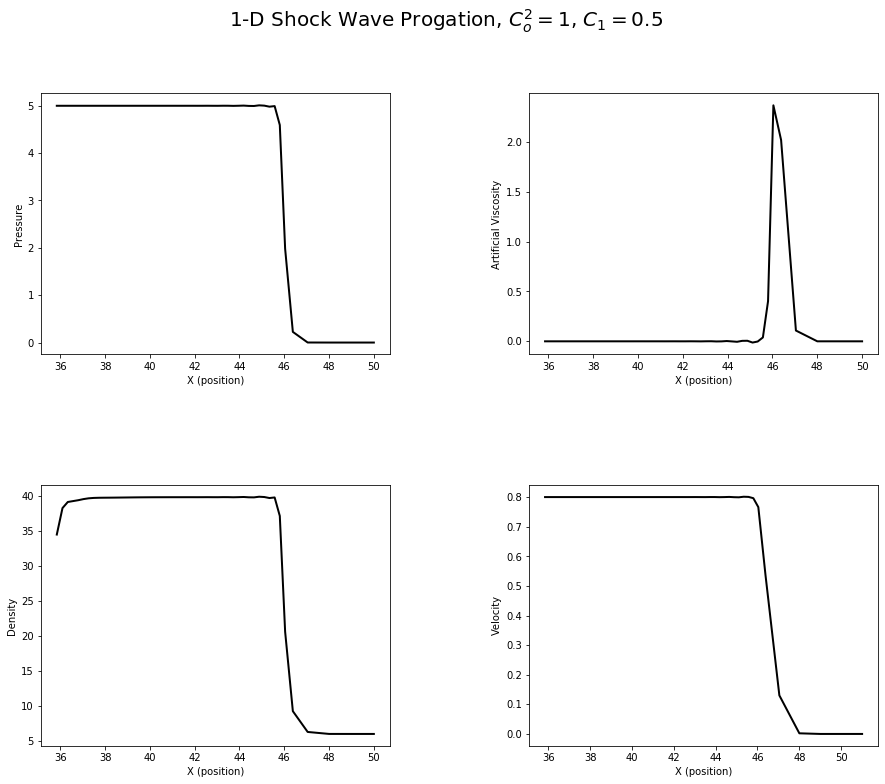

In [448]:
    fig, ax = plt.subplots(2,2, figsize = (15,12))
    plt.subplots_adjust(hspace = 0.5, wspace = 0.4)
    plt.suptitle("1-D Shock Wave Progation, $C_o^2 = 1$, $C_1 = 0.5$", fontsize = 20)
    #plt.figure(figsize=(15, 20))
    ax1 = ax[0,0]
    ax2 = ax[0,1]
    ax3 = ax[1,0]
    ax4 = ax[1,1]

    
    #ax1.errorbar(time, x_obs, yerr=xe,  fmt='o', alpha = .5,color='k', ms = 6,label='data')
    ax1.plot(x_new[1:51], p_new[1:51], 'k', lw = 2)
    ax1.set_ylabel('Pressure')
    ax1.set_xlabel('X (position)')
    #ax1.legend(loc='lower right')
  #  ax1.tight_layout()
    
    
    #ax2.errorbar(time, y_obs, yerr=ye,  fmt='o', alpha = .5,color='k', ms = 6, label='data')
    ax2.plot(x_new[1:51], q_new[1:51], 'k', lw = 2)
    ax2.set_ylabel('Artificial Viscosity')
    ax2.set_xlabel('X (position)')
    #ax2.legend(loc='lower right')
  #  ax2.tight_layout()
    
    
    
    
    ax3.plot(x_new[1:51], rho_new[1:51], 'k', lw = 2)
    
    ax3.set_ylabel('Density')
    ax3.set_xlabel('X (position)')
    #ax3.legend(loc='lower right', fontsize = 15)
  #  ax3.tight_layout()
    
    
    
    ax4.plot(x_new[1:52], u_new[1:52], 'k', lw = 2)
    
    ax4.set_ylabel('Velocity')
    ax4.set_xlabel('X (position)')
    #ax4.legend(loc='upper right',fontsize = 15)
 #   ax4.tight_layout()
    
    
   

    fig.savefig('1_D_shock_wave_pro.png')